## Final Project Submission

Please fill out:
* Student name: *Sharon Njogu* 
* Student pace: *part time*
* Scheduled project review date/time: 
* Instructor name: *Asha Deen*
* Blog post URL:


## Project Overview

This project aims to explore the characteristics of successful movies at the box office using various movie datasets from sources such as Box Office Mojo, IMDB, and The Numbers. The objective is to provide actionable insights to the head of Microsoft's new movie studio, helping them make informed decisions on the types of films to create.

Through exploratory data analysis (EDA) and data visualization techniques, I will analyze factors such as box office performance, genre trends, and audience reception. By examining metrics like revenue, ratings, and audience feedback, I will identify the key attributes and patterns associated with successful movies.

The project will address questions such as:

- What are the factors that contribute to the success of a movie at the box office?
- Which movie genres tend to perform well in terms of box office revenue?
- How does audience reception, including ratings and reviews, correlate with box office success?
- Are there any specific release date patterns or seasonal trends that impact box office performance?
- What are the recent market trends and emerging themes in the film industry?

The insights derived from this analysis will guide the decision-making process for Microsoft's new movie studio, helping them select the right genres, target audiences, and strategies for their upcoming film production.


In [345]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
# Loading the necessary data sets.
movies_df = pd.read_csv('unzippedData/bom.movie_gross.csv')
basics_df = pd.read_csv('unzippedData/imdb.title.basics.csv')
ratings_df = pd.read_csv('unzippedData/imdb.title.ratings.csv')
budgets_df = pd.read_csv('unzippedData/tn.movie_budgets.csv')

## Inspecting Data Contents , Data Cleaning and Dealing with Missing Values.

In [347]:
movies_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [348]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [352]:
# Dropping missing values in domestic gross and studio as the proportion of rows with missing values is very small compared to the size of the overall dataset 
movies_df.dropna(subset=['studio'], inplace=True)
movies_df.dropna(subset=['domestic_gross'], inplace=True)

# Imputing missing values in the 'foreign_gross' column with zero. Assumption here is lack of revenue/ lack of reported data.
movies_df['foreign_gross'].fillna(0, inplace=True)


In [354]:
# Converting 'foreign_gross' column to numeric data type
movies_df['foreign_gross'] = pd.to_numeric(movies_df['foreign_gross'], errors='coerce')

# Dropping duplicates
movies_df = movies_df.drop_duplicates()

In [355]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [356]:
movies_df.describe()

,domestic_gross,foreign_gross,year
count,3.356000e+03,3.356000e+03,3356.000000
mean,2.877149e+07,4.532518e+07,2013.970203
std,6.700694e+07,1.131263e+08,2.479064
min,1.000000e+02,0.000000e+00,2010.000000
25%,1.200000e+05,0.000000e+00,2012.000000
50%,1.400000e+06,1.400000e+06,2014.000000
75%,2.795000e+07,2.970000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [357]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [359]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [332]:
# replacing missing values in the runtime column with the mean to retain overall distribution and statistics of the data
mean_runtime = basics_df['runtime_minutes'].mean()
basics_df['runtime_minutes'].fillna(mean_runtime, inplace=True)

# replacing missing values in the genre column with the mode to ensure that the imputed values align with the most common genre(s) in the dataset.
mode_genres = basics_df['genres'].mode().iloc[0]
basics_df['genres'].fillna(mode_genres, inplace=True)

# We could drop the rows with no original titles.
basics_df.dropna(subset=['original_title'], inplace=True)

# Dropping duplicates
basics_df = basics_df.drop_duplicates()

basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  146123 non-null  float64
 5   genres           146123 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [360]:
# Dropping duplicates
ratings_df = ratings_df.drop_duplicates()
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [361]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [362]:
ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [364]:
# Dropping duplicates
budgets_df = budgets_df.drop_duplicates()
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 316.2+ KB


In [365]:
# converting numeris columns from object to numeric
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].astype(str).str.replace(r'\$', '', regex=True).str.replace(',', '').apply(pd.to_numeric, errors='coerce')
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].astype(str).str.replace(r'\$', '', regex=True).str.replace(',', '').apply(pd.to_numeric, errors='coerce')
budgets_df['production_budget'] = budgets_df['production_budget'].astype(str).str.replace(r'\$', '', regex=True).str.replace(',', '').apply(pd.to_numeric, errors='coerce')
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [366]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


# Data Exploration

### 1. Exploring the distribution of Domestic gross revenue

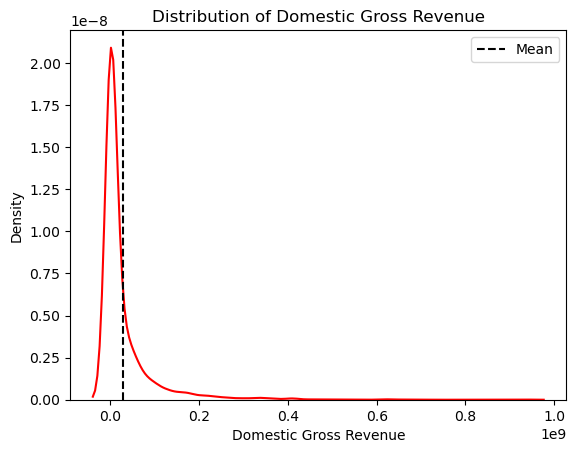

In [450]:
# Creating a KDE plot of domestic gross revenue
sns.kdeplot(data=movies_df, x='domestic_gross', color = 'red')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Density')
plt.title('Distribution of Domestic Gross Revenue')

# Adding a vertical line for the mean
mean_domestic_gross = movies_df['domestic_gross'].mean()
plt.axvline(mean_domestic_gross, color='black', linestyle='--', label='Mean')

plt.legend()
plt.show()


In [452]:
movies_df['domestic_gross'].describe()

count    3.356000e+03
mean     2.877149e+07
std      6.700694e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.795000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [ ]:
###Interpret this graph.

### 2. Comparing genres and worldwide gross revenue

In [343]:
# 1. Merge the 4 data frames
merged_df = movies_df.merge(basics_df, left_on='title', right_on='primary_title')
merged_df = merged_df.merge(budgets_df, left_on='domestic_gross', right_on='domestic_gross')
merged_df = merged_df.merge(ratings_df, left_on='tconst', right_on='tconst')
merged_df.drop_duplicates()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,worldwide_gross,averagerating,numvotes
0,Unstoppable,Fox,81600000.0,86200000.0,2010,tt0477080,Unstoppable,Unstoppable,2010,98.000000,"Action,Thriller",89,"Jan 1, 1970",M*A*S*H,3500000,81600000,6.8,173019
1,Unstoppable,Fox,81600000.0,86200000.0,2010,tt3070502,Unstoppable,Unstoppable,2013,65.000000,Documentary,89,"Jan 1, 1970",M*A*S*H,3500000,81600000,4.3,551
2,Unstoppable,Fox,81600000.0,86200000.0,2010,tt9225192,Unstoppable,Seongnan hwangso,2018,116.000000,"Action,Crime",89,"Jan 1, 1970",M*A*S*H,3500000,81600000,6.5,576
3,Unstoppable,Fox,81600000.0,86200000.0,2010,tt9906218,Unstoppable,Unstoppable,2019,84.000000,Documentary,89,"Jan 1, 1970",M*A*S*H,3500000,81600000,8.1,8
4,Dear John,SGem,80000000.0,35000000.0,2010,tt0989757,Dear John,Dear John,2010,108.000000,"Drama,Romance,War",61,"Feb 17, 1984",Footloose,8200000,80000000,6.3,128657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,Upgrade,BH Tilt,12000000.0,2400000.0,2018,tt6499752,Upgrade,Upgrade,2018,100.000000,"Action,Sci-Fi,Thriller",3,"Feb 23, 1966",Harper,3500000,12000000,7.6,104978
725,Upgrade,BH Tilt,12000000.0,2400000.0,2018,tt6739824,Upgrade,Upgrade,2016,86.187247,Drama,53,"Jun 24, 1977",Sorcerer,21600000,12005968,8.8,69
726,Upgrade,BH Tilt,12000000.0,2400000.0,2018,tt6739824,Upgrade,Upgrade,2016,86.187247,Drama,3,"Feb 23, 1966",Harper,3500000,12000000,8.8,69
727,Midnight Sun,Global Road,9600000.0,17800000.0,2018,tt4799066,Midnight Sun,Midnight Sun,2018,91.000000,"Drama,Romance",37,"Jul 28, 1954",On the Waterfront,910000,9600000,6.6,16220


In [370]:
# Extracting the relevant columns
genres_gross_df = merged_df[['genres', 'worldwide_gross']].copy()

# Grouping the data by genre and calculating the total worldwide gross revenue for each.
grouped_genres = genres_gross_df.groupby('genres').sum().sort_values(by='worldwide_gross', ascending=False)
grouped_genres

,worldwide_gross
genres,
Comedy,544759017
"Biography,Comedy,Drama",471333903
Drama,436329819
Documentary,435758945
"Comedy,Drama,Romance",401695248
...,...
"Drama,Fantasy,Horror",55000
"Crime,Horror,Mystery",55000
"Action,Drama,Horror",21000


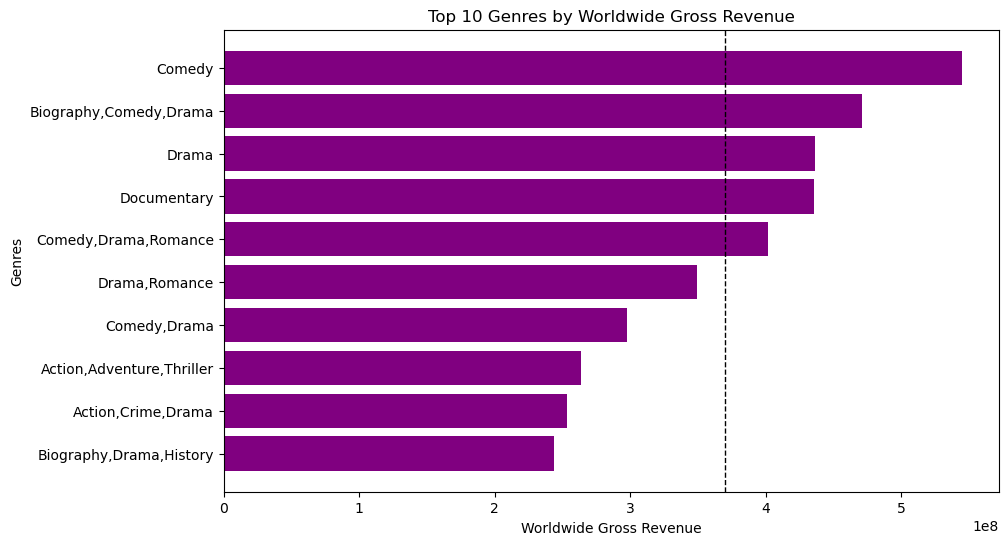

In [455]:
# Plotting the bar chart and selecting the top 10 genres
top_genres = grouped_genres.nlargest(10, 'worldwide_gross')

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_genres.index, top_genres['worldwide_gross'], color = '#800080')
plt.xlabel('Worldwide Gross Revenue')
plt.ylabel('Genres')
plt.title('Top 10 Genres by Worldwide Gross Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to show highest revenue at the top
plt.axvline(top_genres['worldwide_gross'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.show()



The above horizontal bar shows genres and their income generation levels, with comedy leading the stack.

In [453]:
top_genres.describe()

,worldwide_gross
count,1.000000e+01
mean,3.696924e+08
std,1.039286e+08
min,2.434000e+08
25%,2.721186e+08
50%,3.754757e+08
75%,4.361871e+08
max,5.447590e+08


### 3. Finding Highest-rated Genres to explore audience perception.

In [433]:
# Selecting the top 10 genres with the highest ratings
top_genres_ratings = merged_df.groupby('genres')['averagerating'].mean().nlargest(10)

top_genres_ratings

genres
Documentary,Drama                 8.600
Crime,Documentary                 8.300
Animation,Drama,Fantasy           8.175
Biography,Documentary,Thriller    8.100
Comedy,Drama,Thriller             8.100
Documentary,Drama,History         8.100
Biography,Documentary,Music       8.000
Biography,Documentary,Mystery     7.700
Action,Sci-Fi,Thriller            7.600
Animation,Drama,Family            7.500
Name: averagerating, dtype: float64

In [434]:
# Filtering the data to include only the top 10 genres
top_genres_df = merged_df[merged_df['genres'].isin(top_genres_ratings.index)]

top_genres_df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,worldwide_gross,averagerating,numvotes
46,From Up on Poppy Hill,GK,1000000.0,60000000.0,2013,tt1798188,From Up on Poppy Hill,Kokuriko-zaka kara,2011,91.0,"Animation,Drama,Family",23,"Jan 1, 1978",Caravans,14000000,1000000,7.5,26531
47,From Up on Poppy Hill,GK,1000000.0,60000000.0,2013,tt1798188,From Up on Poppy Hill,Kokuriko-zaka kara,2011,91.0,"Animation,Drama,Family",49,"Aug 5, 1977",March or Die,7000000,1000000,7.5,26531
62,Third Person,SPC,1000000.0,0.0,2014,tt4076360,Third Person,Guf Shlishi,2015,57.0,"Documentary,Drama",23,"Jan 1, 1978",Caravans,14000000,1000000,8.6,10
63,Third Person,SPC,1000000.0,0.0,2014,tt4076360,Third Person,Guf Shlishi,2015,57.0,"Documentary,Drama",49,"Aug 5, 1977",March or Die,7000000,1000000,8.6,10
108,Finding Vivian Maier,IFC,1500000.0,0.0,2014,tt2714900,Finding Vivian Maier,Finding Vivian Maier,2013,83.0,"Biography,Documentary,Mystery",50,"Jan 1, 1980",Lion of the Desert,35000000,1500000,7.7,12033
109,Finding Vivian Maier,IFC,1500000.0,0.0,2014,tt2714900,Finding Vivian Maier,Finding Vivian Maier,2013,83.0,"Biography,Documentary,Mystery",38,"Apr 23, 1986",Salvador,4500000,1500000,7.7,12033
122,The Square,Magn.,1500000.0,0.0,2017,tt2486682,The Square,Al midan,2013,108.0,"Documentary,Drama,History",50,"Jan 1, 1980",Lion of the Desert,35000000,1500000,8.1,7998
123,The Square,Magn.,1500000.0,0.0,2017,tt2486682,The Square,Al midan,2013,108.0,"Documentary,Drama,History",38,"Apr 23, 1986",Salvador,4500000,1500000,8.1,7998
141,Wild Tales,SPC,3100000.0,23900000.0,2015,tt3011894,Wild Tales,Relatos salvajes,2014,122.0,"Comedy,Drama,Thriller",42,"Jun 14, 2019",Men in Black: International,110000000,3100000,8.1,151123
142,Wild Tales,SPC,3100000.0,23900000.0,2015,tt3011894,Wild Tales,Relatos salvajes,2014,122.0,"Comedy,Drama,Thriller",100,"Aug 30, 1972",The Last House on the Left,87000,3100000,8.1,151123


In [444]:
# Grouping the data by genre and rating
genre_ratings = top_genres_df.groupby(['genres', 'averagerating']).size().unstack()

genre_ratings

averagerating,7.5,7.6,7.7,7.8,8.1,8.2,8.3,8.4,8.6
genres,,,,,,,,,
"Action,Sci-Fi,Thriller",NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Animation,Drama,Family",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Animation,Drama,Fantasy",1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
"Biography,Documentary,Music",NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
"Biography,Documentary,Mystery",NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
"Biography,Documentary,Thriller",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"Comedy,Drama,Thriller",NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
"Crime,Documentary",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
"Documentary,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


<Figure size 2200x1800 with 0 Axes>

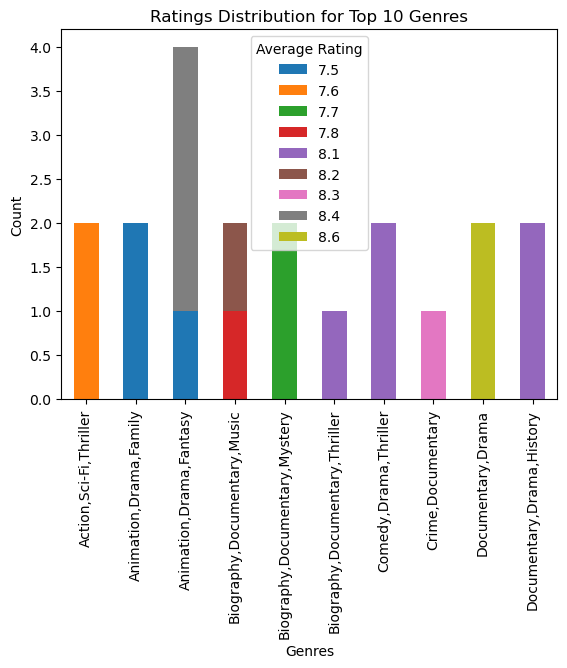

In [446]:
# Plotting the stacked bar graphs
plt.figure(figsize=(22, 18))
genre_ratings.plot(kind='bar', stacked = True)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Ratings Distribution for Top 10 Genres')
plt.legend(title='Average Rating')
plt.show()

In [447]:
#####interpret this graph

### 4. Comparing release dates and average ratings to explore whether seasons have an impact on audience reception.

In [427]:
import calendar

# Extracting the relevant columns
release_avg_rating_df = merged_df[['release_date', 'averagerating']].copy()

# Converting release_date column to datetime format
release_avg_rating_df['release_date'] = pd.to_datetime(release_avg_rating_df['release_date'])
release_avg_rating_df

,release_date,averagerating
0,1970-01-01,6.8
1,1970-01-01,4.3
2,1970-01-01,6.5
3,1970-01-01,8.1
4,1984-02-17,6.3
...,...,...
724,1966-02-23,7.6
725,1977-06-24,8.8
726,1966-02-23,8.8
727,1954-07-28,6.6


In [428]:
# Creating a new column 'season' based on the month of the release date
release_avg_rating_df['month'] = release_avg_rating_df['release_date'].apply(lambda x: calendar.month_name[x.month])

# Filtering the data to include only average ratings of 5 and above
filtered_release_avg_rating_df = release_avg_rating_df[release_avg_rating_df['averagerating'] >= 5]

# Grouping the data by season and calculating the average rating
grouped_release_avg_rating_df = filtered_release_avg_rating_df.groupby('month')['averagerating'].mean().reset_index()
grouped_release_avg_rating_df

,month,averagerating
0,April,6.803390
1,August,6.871642
2,December,6.735185
3,February,6.794915
4,January,6.746043
5,July,6.459091
6,June,6.826437
7,March,6.738000
8,May,6.752727
9,November,6.661905


In [429]:
# Sorting the data based on the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_release_avg_rating_df['month'] = pd.Categorical(grouped_release_avg_rating_df['month'], categories=month_order, ordered=True)
grouped_release_avg_rating_df = grouped_release_avg_rating_df.sort_values('month')

grouped_release_avg_rating_df

,month,averagerating
4,January,6.746043
3,February,6.794915
7,March,6.738000
0,April,6.803390
8,May,6.752727
6,June,6.826437
5,July,6.459091
1,August,6.871642
11,September,6.690323
10,October,6.757143


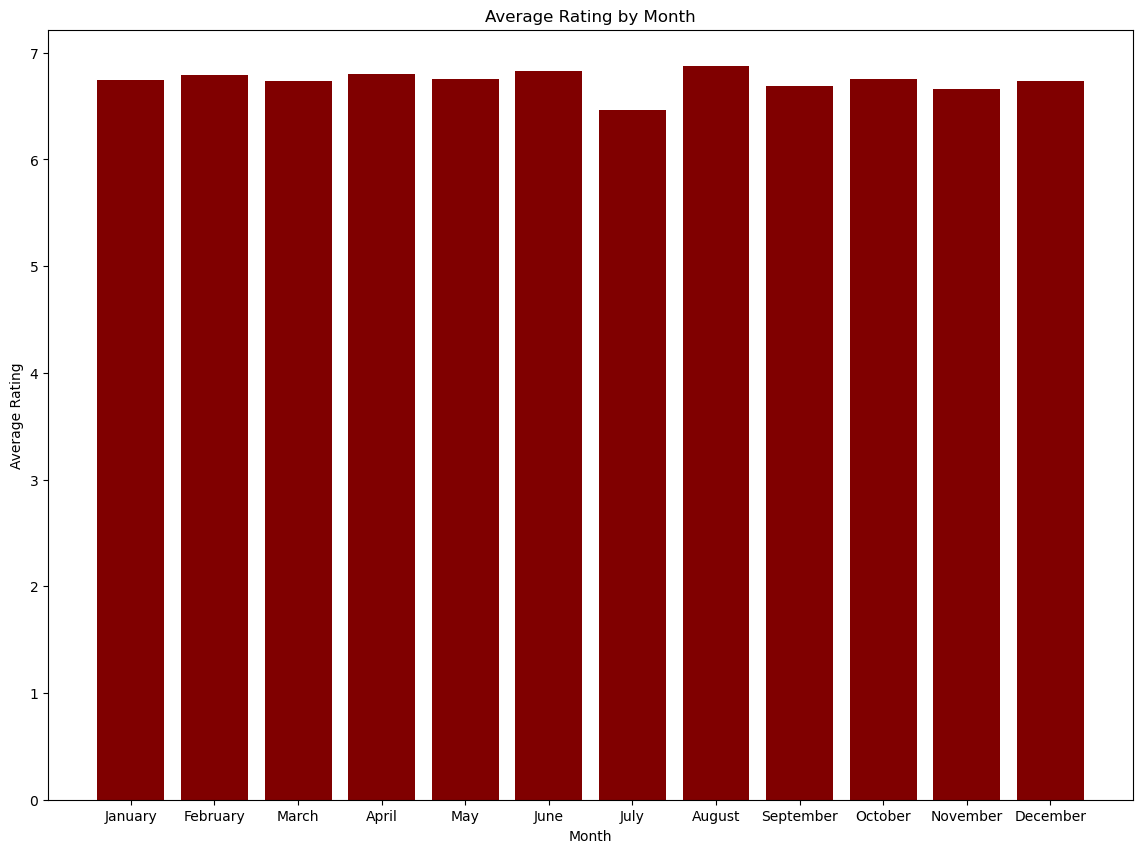

In [430]:
# Plotting the bar chart
plt.figure(figsize=(14, 10))
plt.bar(grouped_release_avg_rating_df['month'], grouped_release_avg_rating_df['averagerating'], color = '#800000')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Rating by Month')

plt.show()


According to the graph, seasons have no impact on audience reception.

### 5. Comparing production budget and ratings to explore the relationship between production budget and success of a movie.

In [420]:
# Extracting the relevant columns
production_rating_df = merged_df[['production_budget', 'averagerating']].copy()

# Sorting the data based on production budget
production_rating_df = production_rating_df.sort_values('production_budget')

production_rating_df


,production_budget,averagerating
720,25000,6.0
140,87000,6.8
138,87000,6.6
150,87000,7.0
148,87000,4.7
...,...,...
147,110000000,4.7
149,110000000,7.0
139,110000000,6.8
135,110000000,8.1


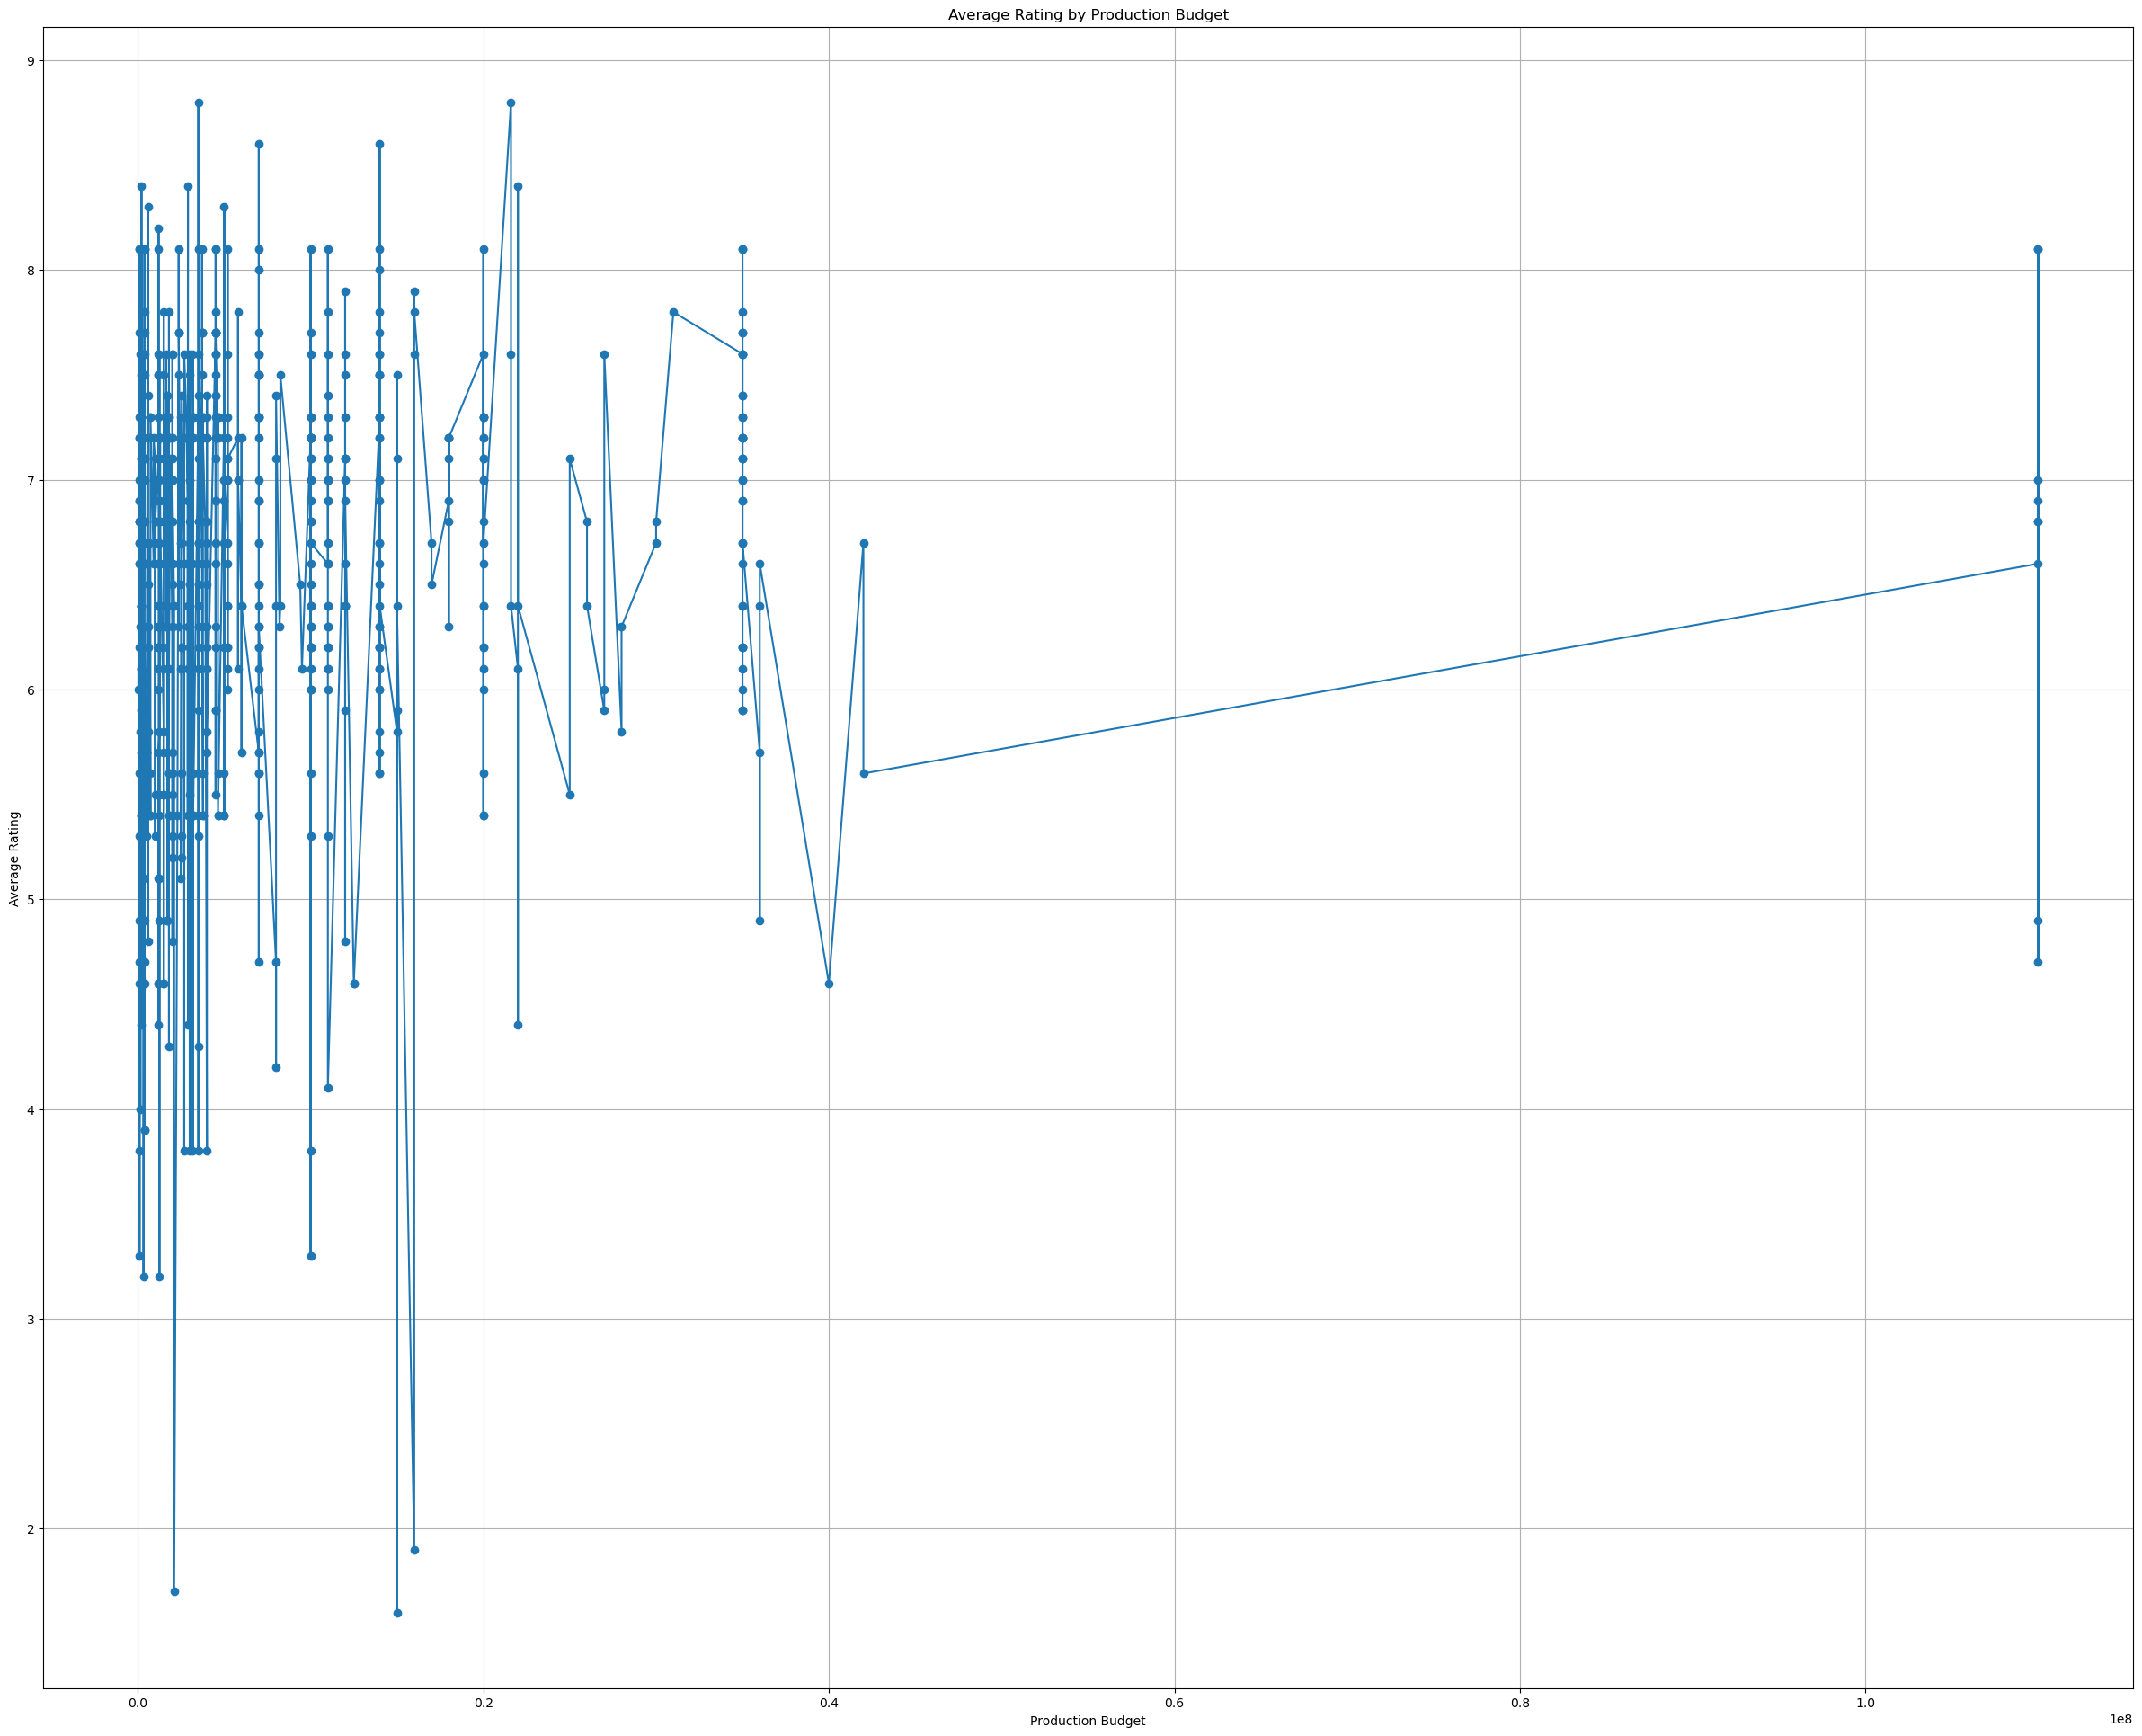

In [421]:
# Plotting the line graph
plt.figure(figsize=(30, 24))
plt.plot(production_rating_df['production_budget'], production_rating_df['averagerating'], marker='o', linestyle='-')
plt.xlabel('Production Budget')
plt.ylabel('Average Rating')
plt.title('Average Rating by Production Budget')
plt.grid(True)
plt.show()

In [422]:
##### interpret the above diagram

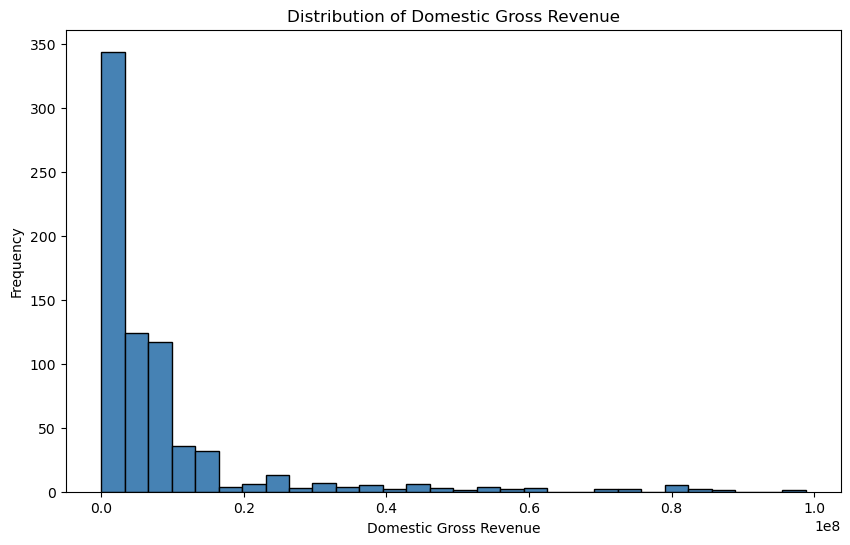

In [448]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['domestic_gross'], bins=30, color='steelblue', edgecolor='black')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Domestic Gross Revenue')
plt.show()
